In [17]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
%matplotlib inline
fig_dir = "/Users/crankshaw/model-serving/clipper_paper/ModelServingPaper/nsdi_2017/fake-figs"

log_loc = os.path.abspath(".")

results_files = []
for name in os.listdir(log_loc):
    if "results" in name:
        results_files.append(name)
print results_files
# exp_names = [f for f in results_files]
# print exp_names

['batch_size_10000_160909-141523_results.json', 'batch_size_1000_160909-140848_results.json', 'batch_size_100_160909-140559_results.json', 'batch_size_10_160909-140313_results.json', 'batch_size_1_160909-140038_results.json', 'batch_size_2000_160909-141013_results.json', 'batch_size_200_160909-140652_results.json', 'batch_size_20_160909-140407_results.json', 'batch_size_2_160909-140131_results.json', 'batch_size_5000_160909-141211_results.json', 'batch_size_500_160909-140745_results.json', 'batch_size_50_160909-140456_results.json', 'batch_size_5_160909-140222_results.json']


In [18]:
def get_results(res_fname):
#     res_fname = fname + "_results.json"
#     conf_fname = fname + "_config.json"
    with open(os.path.join(log_loc, res_fname), "r") as rf:
        results = json.load(rf)
#         print(results)
        set_batch_size = int(res_fname.split("_")[2])
#         print message_size
#         print json.dumps(results, indent=4)
        actual_batch_size = [l["mean"] for l in results["histograms"] if l["name"] == "noop:model_batch_size"][0]
        thruput = [m["rate"] for m in results["meters"] if m["name"] == "noop:model_thruput"][0]
    return (set_batch_size, actual_batch_size, thruput)
extracted_results = [get_results(r) for r in results_files]
extracted_results.sort()

In [29]:

message_size=200000
set_batch_sizes, actual_batch_sizes, chunk_thrus = zip(*extracted_results)
set_batch_sizes = np.array(set_batch_sizes)
actual_batch_sizes = np.array(actual_batch_sizes)

chunk_thrus = np.array(chunk_thrus)
chunk_sizes = message_size / set_batch_sizes
print zip(actual_batch_sizes, chunk_sizes)
thruputs = chunk_thrus*chunk_sizes/784.0

print thruputs



# xs = xs/784.0


[(1.0, 200000), (1.9987966305655835, 100000), (4.9955406911928648, 40000), (9.992287917737789, 20000), (19.973611111111111, 10000), (49.967826657912013, 4000), (99.885913853317817, 2000), (199.43875502008032, 1000), (499.33404406538733, 400), (999.05877034358048, 200), (1998.9353914704011, 100), (4996.3573851372184, 40), (9971.5691648822267, 20)]
[ 12469.36107226  12072.21031806  13164.45534821  14258.26095248
  11773.81237531  13176.93995386  11507.24183364  12212.75668337
  12229.66233263  10936.34935191   9414.90418965   5228.33876654
   2613.28706772]


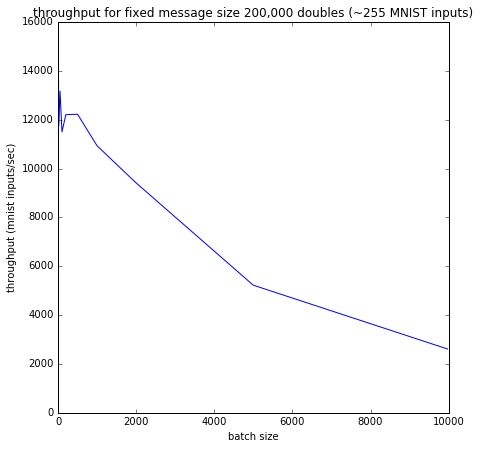

In [30]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(actual_batch_sizes, thruputs)
ax.set_xlabel("batch size")
ax.set_ylabel("throughput (mnist inputs/sec)")
ax.set_title("throughput for fixed message size 200,000 doubles (~255 MNIST inputs)")
ax.yaxis.get_major_formatter().set_powerlimits((0, 100000000000))
ax.set_ylim((0, ax.get_ylim()[1]))

plt.show()

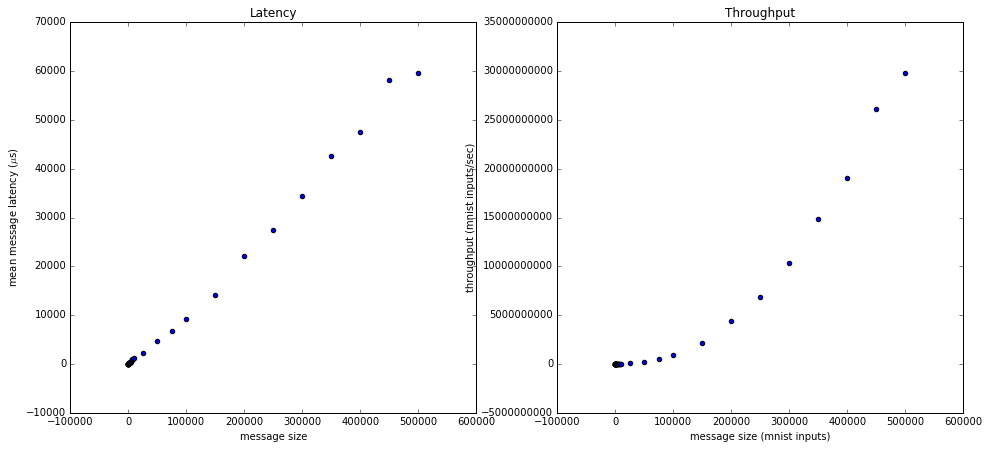

In [42]:



fig, (ax_l, ax_thru) = plt.subplots(nrows=1, ncols=2, figsize=(16,7))
ax_l.scatter(xs, lats)
ax_l.set_xlabel("message size")
ax_l.set_ylabel("mean message latency ($\mu$s)")
ax_l.set_title("Latency")


ax_thru.scatter(xs, thrus*xs)
ax_thru.set_xlabel("message size (mnist inputs)")
ax_thru.set_ylabel("throughput (mnist inputs/sec)")
ax_thru.set_title("Throughput")
ax_thru.yaxis.get_major_formatter().set_powerlimits((0, 100000000000))
# ax_thru.set_yscale("log")
# ax_thru.set_xscale("log")
plt.show()
